<span style="color:gray; font-weight: bold">Editor:</span> <span style="color:gray; font-weight: bold; font-style: italic">Dar Lador, she codes;</span>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import *
set_option('display.notebook_repr_html', False)  # turn off html, i.e., without table.
set_option('display.max_rows', 500)   # getting the summary of the view versus getting everything. Terminal takes time to buffer.
import pandas
pandas.__version__

'1.2.3'

In [2]:
names = read_csv('baby-names2.csv')

In [3]:
names.info(verbose=True)  # NOTE: This is the new way of to do that.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     258000 non-null  int64  
 1   name     258000 non-null  object 
 2   prop     258000 non-null  float64
 3   sex      258000 non-null  object 
 4   soundex  258000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [4]:
names.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [5]:
names[names.year == 1880].head()    # choosing a series

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [6]:
names[names.year == 1880].tail()

        year     name      prop   sex soundex
129995  1880  Emaline  0.000041  girl    E545
129996  1880    Ester  0.000041  girl    E236
129997  1880    Eulah  0.000041  girl    E400
129998  1880  Eulalie  0.000041  girl    E440
129999  1880     Euna  0.000041  girl    E500

In [7]:
boys = names[names.sex == 'boy']    # segment the data into boy and girl names. We have 2 dataframes now.
girls = names[names.sex == 'girl']

In [15]:
boys.groupby('year')

In [12]:
boys.groupby('year').size().tail()

year
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
dtype: int64

In [11]:
names.groupby(['year', 'sex']).size().head()

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
dtype: int64

In [13]:
type(names.groupby(['year', 'sex']).size())

pandas.core.series.Series

In [14]:
names.groupby(['year', 'sex']).size().loc[2000]    # select out by year: 2001, 2002. Only show the inner key.

sex
boy     1000
girl    1000
dtype: int64

In [16]:
boys[boys.year == 2000].info(verbose=True)   # We would like to find out most popular boy names for each year.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 120000 to 120999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     1000 non-null   int64  
 1   name     1000 non-null   object 
 2   prop     1000 non-null   float64
 3   sex      1000 non-null   object 
 4   soundex  1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.9+ KB


In [17]:
boys[boys.year == 2000].prop
# the proportion of names that were given to a particular boy in decending order

120000    0.016514
120001    0.015346
120002    0.013695
120003    0.013194
120004    0.011990
            ...   
120995    0.000071
120996    0.000071
120997    0.000071
120998    0.000071
120999    0.000071
Name: prop, Length: 1000, dtype: float64

In [18]:
boys[boys.year == 2000][:5] #the 5 most popular boys names

        year         name      prop  sex soundex
120000  2000        Jacob  0.016514  boy    J210
120001  2000      Michael  0.015346  boy    M240
120002  2000      Matthew  0.013695  boy    M300
120003  2000       Joshua  0.013194  boy    J200
120004  2000  Christopher  0.011990  boy    C623

In [19]:
boys[boys.year == 2000].prop.idxmax() # the index of the most popular name (the maximal proportion).

120000

In [20]:
boys.loc[boys[boys.year == 2000].prop.idxmax()]  # to get the whole row.

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [21]:
def get_max_record(group):
    return group.loc[group.prop.idxmax()]

get_max_record(boys) # the most popular name from all time

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [22]:
def get_max_record(group):
    return group.loc[group.prop.idxmax()]

result = boys.groupby('year').apply(get_max_record)
# splits up the data by year and it applies this function above for each one to retrieve

In [23]:
result   # the popularity of a certain name goes down over time.

      year     name      prop  sex soundex
year                                      
1880  1880     John  0.081541  boy    J500
1881  1881     John  0.080975  boy    J500
1882  1882     John  0.078314  boy    J500
1883  1883     John  0.079066  boy    J500
1884  1884     John  0.076476  boy    J500
1885  1885     John  0.075517  boy    J500
1886  1886     John  0.075820  boy    J500
1887  1887     John  0.074181  boy    J500
1888  1888     John  0.071186  boy    J500
1889  1889     John  0.071804  boy    J500
1890  1890     John  0.071034  boy    J500
1891  1891     John  0.070292  boy    J500
1892  1892     John  0.068759  boy    J500
1893  1893     John  0.066495  boy    J500
1894  1894     John  0.065961  boy    J500
1895  1895     John  0.065699  boy    J500
1896  1896     John  0.063051  boy    J500
1897  1897     John  0.061907  boy    J500
1898  1898     John  0.061770  boy    J500
1899  1899     John  0.060674  boy    J500
1900  1900     John  0.060619  boy    J500
1901  1901 

<AxesSubplot:xlabel='year'>

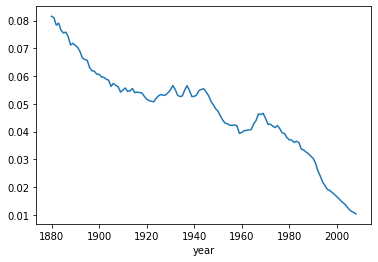

In [24]:
result.prop.plot()# shows creativity of name choosing -lower means more creative

In [25]:
boys[boys.name == 'Travis']

        year    name      prop  sex soundex
563     1880  Travis  0.000101  boy    T612
2648    1882  Travis  0.000082  boy    T612
3672    1883  Travis  0.000080  boy    T612
4656    1884  Travis  0.000081  boy    T612
5602    1885  Travis  0.000095  boy    T612
6598    1886  Travis  0.000092  boy    T612
9871    1889  Travis  0.000059  boy    T612
10733   1890  Travis  0.000075  boy    T612
11696   1891  Travis  0.000082  boy    T612
12593   1892  Travis  0.000099  boy    T612
13831   1893  Travis  0.000066  boy    T612
14849   1894  Travis  0.000064  boy    T612
15735   1895  Travis  0.000079  boy    T612
16774   1896  Travis  0.000077  boy    T612
17645   1897  Travis  0.000098  boy    T612
18991   1898  Travis  0.000053  boy    T612
19658   1899  Travis  0.000095  boy    T612
20442   1900  Travis  0.000166  boy    T612
22552   1902  Travis  0.000121  boy    T612
23778   1903  Travis  0.000077  boy    T612
24510   1904  Travis  0.000137  boy    T612
25505   1905  Travis  0.000147  

In [26]:
idf = boys.set_index(['name', 'year'])   # pull out the indexes, and move them to the row.

In [27]:
idf[-50:]

                    prop  sex soundex
name      year                       
Reilly    2008  0.000097  boy    R400
Sheldon   2008  0.000097  boy    S435
Abdullah  2008  0.000097  boy    A134
Jagger    2008  0.000097  boy    J260
Thaddeus  2008  0.000097  boy    T320
Case      2008  0.000096  boy    C200
Kyson     2008  0.000096  boy    K250
Lamont    2008  0.000096  boy    L553
Chaz      2008  0.000096  boy    C200
Makhi     2008  0.000096  boy    M200
Jan       2008  0.000095  boy    J500
Marques   2008  0.000095  boy    M622
Oswaldo   2008  0.000095  boy    O243
Donavan   2008  0.000095  boy    D515
Keyon     2008  0.000095  boy    K500
Kyan      2008  0.000095  boy    K500
Simeon    2008  0.000095  boy    S550
Trystan   2008  0.000095  boy    T623
Andreas   2008  0.000094  boy    A536
Dangelo   2008  0.000094  boy    D524
Landin    2008  0.000094  boy    L535
Reagan    2008  0.000094  boy    R250
Turner    2008  0.000094  boy    T656
Arnav     2008  0.000094  boy    A651
Brenton   20

In [28]:
idf.loc['Travis']

          prop  sex soundex
year                       
1880  0.000101  boy    T612
1882  0.000082  boy    T612
1883  0.000080  boy    T612
1884  0.000081  boy    T612
1885  0.000095  boy    T612
1886  0.000092  boy    T612
1889  0.000059  boy    T612
1890  0.000075  boy    T612
1891  0.000082  boy    T612
1892  0.000099  boy    T612
1893  0.000066  boy    T612
1894  0.000064  boy    T612
1895  0.000079  boy    T612
1896  0.000077  boy    T612
1897  0.000098  boy    T612
1898  0.000053  boy    T612
1899  0.000095  boy    T612
1900  0.000166  boy    T612
1902  0.000121  boy    T612
1903  0.000077  boy    T612
1904  0.000137  boy    T612
1905  0.000147  boy    T612
1906  0.000118  boy    T612
1907  0.000132  boy    T612
1908  0.000150  boy    T612
1909  0.000181  boy    T612
1910  0.000149  boy    T612
1911  0.000166  boy    T612
1912  0.000171  boy    T612
1913  0.000203  boy    T612
1914  0.000220  boy    T612
1915  0.000182  boy    T612
1916  0.000204  boy    T612
1917  0.000215  boy 

<AxesSubplot:xlabel='year'>

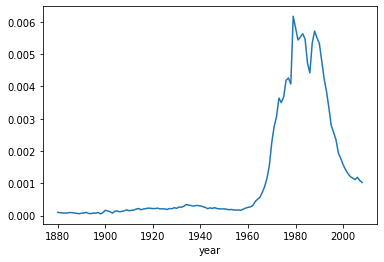

In [29]:
idf.loc['Travis'].prop.plot()

In [30]:
boys.groupby('name')['prop'].mean() # the mean proportion by name across the data set

name
Aaden      0.000442
Aarav      0.000101
Aaron      0.002266
Ab         0.000044
Abb        0.000046
             ...   
Zenas      0.000052
Zeno       0.000071
Zigmund    0.000052
Zion       0.000490
Zollie     0.000060
Name: prop, Length: 3437, dtype: float64

In [31]:
boys.groupby('name')['prop'].mean().sort_values()

name
Danniel     0.000027
Kennard     0.000027
Grayling    0.000027
Deryl       0.000027
Cheryl      0.000028
              ...   
Charles     0.019521
Robert      0.029625
William     0.034182
James       0.035465
John        0.041082
Name: prop, Length: 3437, dtype: float64

In [32]:
boys['prop'].describe()   # Getting the summary of statistics from the dataframe, based on proportion.e

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
Name: prop, dtype: float64

In [33]:
result = boys.groupby('year')['prop'].describe()

In [34]:
result[:50]

       count      mean       std       min       25%       50%       75%  \
year                                                                       
1880  1000.0  0.000931  0.004871  0.000042  0.000059  0.000118  0.000372   
1881  1000.0  0.000930  0.004812  0.000037  0.000065  0.000120  0.000369   
1882  1000.0  0.000928  0.004691  0.000041  0.000066  0.000115  0.000377   
1883  1000.0  0.000929  0.004675  0.000044  0.000062  0.000116  0.000382   
1884  1000.0  0.000927  0.004542  0.000041  0.000065  0.000122  0.000385   
1885  1000.0  0.000926  0.004459  0.000043  0.000069  0.000121  0.000373   
1886  1000.0  0.000926  0.004447  0.000042  0.000067  0.000118  0.000397   
1887  1000.0  0.000925  0.004380  0.000046  0.000073  0.000119  0.000366   
1888  1000.0  0.000923  0.004294  0.000046  0.000069  0.000123  0.000379   
1889  1000.0  0.000924  0.004260  0.000042  0.000067  0.000118  0.000355   
1890  1000.0  0.000921  0.004191  0.000042  0.000067  0.000125  0.000384   
1891  1000.0

In [35]:
df = boys[boys.year == 2008]

In [36]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
            ...   
128995    0.000090
128996    0.000089
128997    0.000089
128998    0.000089
128999    0.000089
Name: prop, Length: 1000, dtype: float64

In [37]:
df = boys[boys.year == 2008].sort_values(by='prop', ascending=False)   
# If not in descending order. Can also do ascending=True for ascending.

In [38]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
            ...   
128995    0.000090
128996    0.000089
128997    0.000089
128998    0.000089
128999    0.000089
Name: prop, Length: 1000, dtype: float64

In [39]:
df.prop.cumsum()   # numpy
# In 2008 the top 1000 boys names only represent ~80% of the given names

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
            ...   
128995    0.795058
128996    0.795147
128997    0.795236
128998    0.795325
128999    0.795414
Name: prop, Length: 1000, dtype: float64

In [40]:
df.prop.cumsum().searchsorted(0.5)[0]   # how many does it take to reach 50%. Also called a measure of diversity.

IndexError: invalid index to scalar variable.

In [41]:
df.prop.cumsum()[:130]

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
128005    0.055160
128006    0.063602
128007    0.072040
128008    0.080308
128009    0.088369
128010    0.096246
128011    0.103940
128012    0.111510
128013    0.118977
128014    0.126239
128015    0.133404
128016    0.140356
128017    0.147110
128018    0.153482
128019    0.159584
128020    0.165669
128021    0.171711
128022    0.177696
128023    0.183670
128024    0.189600
128025    0.195505
128026    0.201343
128027    0.207172
128028    0.212924
128029    0.218338
128030    0.223717
128031    0.229061
128032    0.234334
128033    0.239182
128034    0.244003
128035    0.248758
128036    0.253340
128037    0.257906
128038    0.262453
128039    0.266966
128040    0.271479
128041    0.275903
128042    0.280226
128043    0.284531
128044    0.288831
128045    0.293104
128046    0.297326
128047    0.301496
128048    0.305538
128049    0.309454
128050    0.313330
128051    0.317158
128052    0.

In [42]:
df1 = boys[boys.year == 1880].sort_values(by='prop', ascending=False)   
df1.prop.cumsum().searchsorted(0.5)[0] 
# If you run this code you'll get 15, which means that 15 names were given for 50% of the boys born in 1880.

IndexError: invalid index to scalar variable.

In [43]:
def get_quantile_count(group, quantile = 0.5):
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]

boys.groupby('year').apply(get_quantile_count).plot()

IndexError: invalid index to scalar variable.

In [44]:
def get_quantile_count(group, quantile=0.5):     # Problem with no different colors for boys and girls.
    group = group.groupby('soundex').sum()
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]

#f = lambda x: get_quantile_count(x, 0.1)
q = 0.25
boy_ct = boys.groupby('year').apply(get_quantile_count, quantile=q)   # to pass different values for quantile
girl_ct = girls.groupby('year').apply(get_quantile_count, quantile=q)
boy_ct.plot(label='boy')
girl_ct.plot(label='girl')
plt.legend(loc='best')    # with --pylab=inline, we don't have to do plt.legend()

IndexError: invalid index to scalar variable.

In [45]:
boys[boys.year == 2008].prop.rank()    # mean rank by default.

128000    1000.0
128001     999.0
128002     998.0
128003     997.0
128004     996.0
           ...  
128995       7.5
128996       2.5
128997       2.5
128998       2.5
128999       2.5
Name: prop, Length: 1000, dtype: float64

In [46]:
grouped = boys.groupby('year')['prop']

In [47]:
grouped.transform(Series.rank)   # transform is more rigid than apply. Output the same size as the input.

0         1000.0
1          999.0
2          998.0
3          997.0
4          996.0
           ...  
128995       7.5
128996       2.5
128997       2.5
128998       2.5
128999       2.5
Name: prop, Length: 129000, dtype: float64

In [48]:
grouped.transform(Series.rank).head()

0    1000.0
1     999.0
2     998.0
3     997.0
4     996.0
Name: prop, dtype: float64

In [49]:
boys.head()

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [52]:
import pandas as pd
boys.loc[:,'year_rank'] = grouped.transform(Series.rank)
pd.options.mode.chained_assignment = None

<AxesSubplot:>

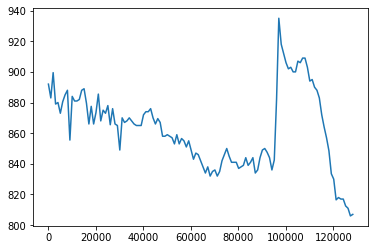

In [53]:
boys[boys.name == 'Wesley'].year_rank.plot()

<AxesSubplot:xlabel='year'>

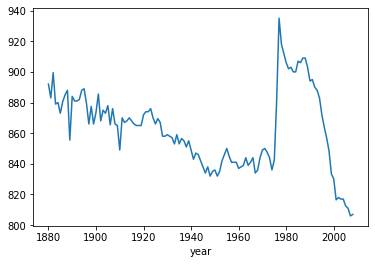

In [54]:
idf = boys.set_index(['name', 'year'])   # same as above
idf.loc['Wesley']
idf.loc['Wesley'].year_rank
idf.loc['Wesley'].year_rank.plot()

In [55]:
% timeit result = grouped.transform(lambda x: x - x.mean()) #to center the values of each group around the mean

UsageError: Line magic function `%` not found.


In [56]:
% timeit result = grouped.apply(lambda x: x - x.mean())

UsageError: Line magic function `%` not found.


In [57]:
names.info(verbose=True)   # Output only the proportion of each name, not the amount.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     258000 non-null  int64  
 1   name     258000 non-null  object 
 2   prop     258000 non-null  float64
 3   sex      258000 non-null  object 
 4   soundex  258000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [59]:
births = read_csv('births.csv')

In [60]:
merged = merge(names, births, on=['year', 'sex'])   # merge 2 tables: names and births.

In [61]:
merge(names, births).info(verbose=True)   # same as above. Join is performed using the common columns: year and sex
                                          # Many to many joins in SQL compute the cartesians products of duplicated keys.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258000 entries, 0 to 257999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     258000 non-null  int64  
 1   name     258000 non-null  object 
 2   prop     258000 non-null  float64
 3   sex      258000 non-null  object 
 4   soundex  258000 non-null  object 
 5   births   258000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.8+ MB


In [62]:
merged['persons'] = np.floor(merged.prop * merged.births)

NameError: name 'np' is not defined

In [63]:
merged.head()

   year     name      prop  sex soundex  births
0  1880     John  0.081541  boy    J500  118405
1  1880  William  0.080511  boy    W450  118405
2  1880    James  0.050057  boy    J520  118405
3  1880  Charles  0.045167  boy    C642  118405
4  1880   George  0.043292  boy    G620  118405

In [ ]:
merged.groupby(['name', 'sex'])['persons'].sum()   # slice and dice. It's a hierarhical labeling.
# number of occurrences of each name

In [ ]:
merged.groupby(['name', 'sex'])['persons'].sum().sort_values()

In [ ]:
mboys = merge(boys, births)  # inner join by default.

In [ ]:
mboys['persons'] = np.floor(mboys.prop * mboys.births) #number of boys of each name

In [ ]:
persons = mboys.set_index(['year', 'name']).persons   # Select out persons

In [ ]:
type(persons)  # One dimensional series.


In [64]:
persons  # hierarhical index

NameError: name 'persons' is not defined

In [ ]:
persons.loc[:, 'Christopher'].plot(kind='bar', rot=90)  
# Select out all the people named Chris. Plot is kind of crowded. Matplotlib doesn't go more than 130 in x axis.

In [ ]:
persons.unstack('name').info(verbose=False)   
# Create a data frame whose columns are each unique names, and the row indexes are the years.

In [ ]:
persons.unstack('name')

In [ ]:
result = _   
# underscore in ipython/jupyter: the output of the last statement, because we don't want to compute again the same thing.

In [ ]:
result.info(verbose=False) 

In [ ]:
result['Wesley']

In [ ]:
result['Wesley'].plot()